# Data: https://www.kaggle.com/rahulsathyajit/shark-tank-pitches

In [1]:
# import python packages for data manipulation
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, RFECV
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.metrics import *

In [2]:
# load data source
df = pd.read_csv('shark_tank.csv')

In [3]:
# preview data
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False


In [4]:
# column info and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 19 columns):
deal                      495 non-null bool
description               495 non-null object
episode                   495 non-null int64
category                  495 non-null object
entrepreneurs             423 non-null object
location                  495 non-null object
website                   457 non-null object
askedFor                  495 non-null int64
exchangeForStake          495 non-null int64
valuation                 495 non-null int64
season                    495 non-null int64
shark1                    495 non-null object
shark2                    495 non-null object
shark3                    495 non-null object
shark4                    495 non-null object
shark5                    495 non-null object
title                     495 non-null object
episode-season            495 non-null object
Multiple Entreprenuers    495 non-null bool
dtypes: bool(2), int64(5), obj

In [5]:
# numeric description of true/false values
int(df.deal[0])

0

In [6]:
# chaning target feature numerical from true/false
df.deal=(df.deal).astype(int)

In [7]:
# changing variable to measure whether or not there are multiple presenors to numeric from true/false
df['Multiple Entreprenuers']=(df['Multiple Entreprenuers']).astype(int)

In [8]:
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,0,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,0
1,1,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,0
2,1,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,0
3,0,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,0
4,0,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,0


In [9]:
# amount of values for each unique feature
df.category.value_counts()

Specialty Food                                 62
Novelties                                      35
Baby and Child Care                            24
Online Services                                22
Personal Care and Cosmetics                    20
Toys and Games                                 19
Storage and Cleaning Products                  17
Outdoor Recreation                             16
Electronics                                    14
Consumer Services                              13
Pet Products                                   13
Entertainment                                  13
Kitchen Tools                                  12
Women's Apparel                                10
Professional Services                          10
Automotive                                     10
Men and Women's Apparel                         9
Baby and Children's Entertainment               9
Women's Accessories                             8
Baby and Children's Apparel and Accessories     8


In [10]:
# changing location to only look at state and not city also
for i in range(len(df)):
    df.location.iloc[i]=df.location[i].split(',')[1]

In [11]:
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,0,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,MN,NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,0
1,1,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,NJ,http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,0
2,1,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,GA,http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,0
3,0,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman",FL,http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,0
4,0,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,NC,http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,0


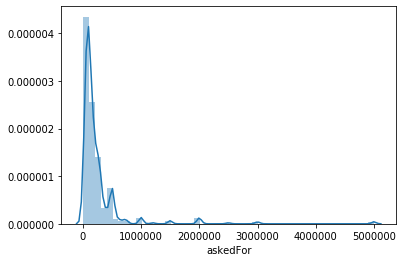

In [12]:
# distribution / histogram of amunt of money asked for
sns.distplot(df.askedFor)

In [13]:
# assigning a new variable for website length
df['website_length']=0
for i in range(len(df)):
    try:
        df['website_length'][i]=len(df.website[i])
    except:
        df['website_length'][i]=0

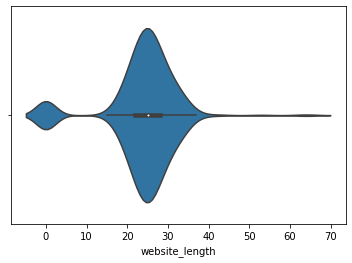

In [14]:
# how long is the average website in characater count
sns.violinplot(df.website_length)

In [134]:
# what would it look like if I cut my website length into bins - what would be my resulting intervals?
pd.cut(df.website_length,bins=3).unique()

[(0.35, 0.526], (-0.000526, 0.175]]
Categories (2, interval[float64]): [(-0.000526, 0.175] < (0.35, 0.526]]

In [16]:
# map short, medium, and long for different website length
df.website_length=pd.cut(df.website_length,bins=3,labels=['short','medium','long'])

In [17]:
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers,website_length
0,0,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,MN,NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,0,short
1,1,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,NJ,http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,0,short
2,1,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,GA,http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,0,medium
3,0,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman",FL,http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,0,medium
4,0,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,NC,http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,0,medium


In [18]:
# replace empty spaces in column names
df.columns = df.columns.str.replace(' ', '_')

In [19]:
df.columns

Index(['deal', 'description', 'episode', 'category', 'entrepreneurs',
       'location', 'website', 'askedFor', 'exchangeForStake', 'valuation',
       'season', 'shark1', 'shark2', 'shark3', 'shark4', 'shark5', 'title',
       'episode-season', 'Multiple_Entreprenuers', 'website_length'],
      dtype='object')

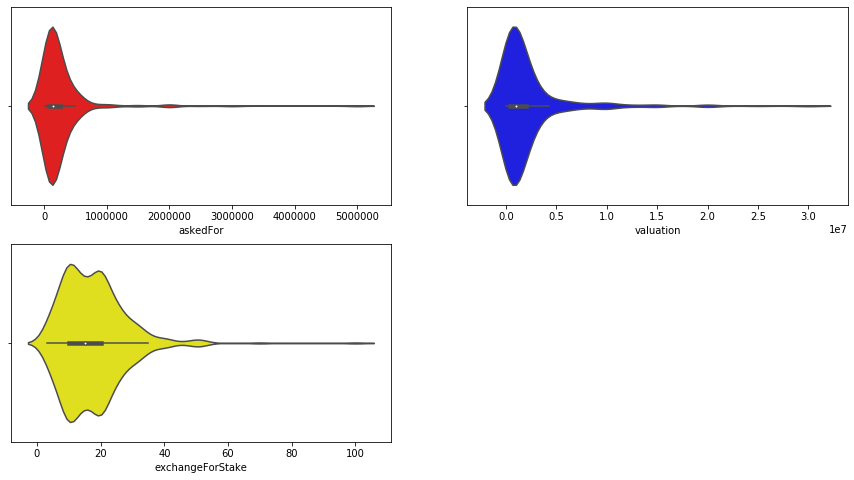

In [20]:
# some distributions so I can know how to bin valuation and other variables
i=1
j=0
colors=['red','blue','yellow']
plt.figure(figsize=(15,8))
for col in ['askedFor','valuation','exchangeForStake']:
    plt.subplot(2,2,i)
    sns.violinplot(df[col],color=colors[j])
    i=i+1
    j+=1

In [21]:
# filter outliers function based on a certain amount of standard deviations
def filter_outliers(dataframe,threshold):
    """
    Input a data frame and have all outliers filtered to a certain and custom threshold of standard deviations
    """
    dataframe = dataframe[(np.abs(stats.zscore(dataframe)) <= threshold).all(axis=1)]
    return dataframe

In [22]:
# rows by columns in data
df.shape

(495, 20)

In [23]:
# assigning string type to website length
df.website_length=df.website_length.astype(str)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 20 columns):
deal                      495 non-null int64
description               495 non-null object
episode                   495 non-null int64
category                  495 non-null object
entrepreneurs             423 non-null object
location                  495 non-null object
website                   457 non-null object
askedFor                  495 non-null int64
exchangeForStake          495 non-null int64
valuation                 495 non-null int64
season                    495 non-null int64
shark1                    495 non-null object
shark2                    495 non-null object
shark3                    495 non-null object
shark4                    495 non-null object
shark5                    495 non-null object
title                     495 non-null object
episode-season            495 non-null object
Multiple_Entreprenuers    495 non-null int64
website_length            49

In [25]:
# new data frame with only numeric data that has filtered out weird outliers
df_filter_num = filter_outliers(df.select_dtypes(include=[int,float]),2)

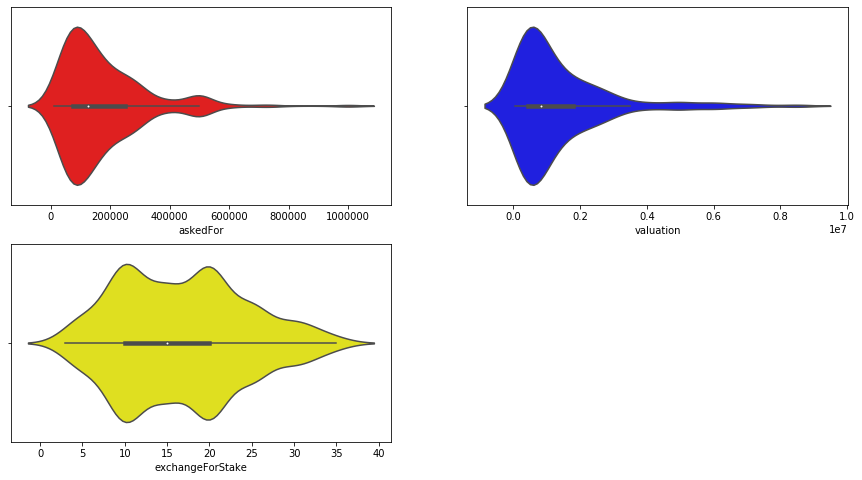

In [26]:
# what does the data look like with outliers removed
i=1
j=0
colors=['red','blue','yellow']
plt.figure(figsize=(15,8))
for col in ['askedFor','valuation','exchangeForStake']:
    plt.subplot(2,2,i)
    sns.violinplot(df_filter_num[col],color=colors[j])
    i=i+1
    j+=1

In [27]:
# adding bins for asked size and value size
df_filter_num['asked_size']=pd.cut(df_filter_num.askedFor,bins=3,labels=['small','medium','large'])
df_filter_num['value_size']=pd.cut(df_filter_num.askedFor,bins=3,labels=['small','medium','large'])

In [28]:
# categorical data that aligns with numerical data at corresponding index
df_filter_cat = df[df.index.isin(df_filter_num.index)].select_dtypes(include='O')

In [29]:
# preview of categorical data (non-numeric data, basically)
df_filter_cat.head()

,description,category,entrepreneurs,location,website,shark1,shark2,shark3,shark4,shark5,title,episode-season,website_length
0,Bluetooth device implant for your ear.,Novelties,Darrin Johnson,MN,NaN,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,short
1,Retail and wholesale pie factory with two reta...,Specialty Food,Tod Wilson,NJ,http://whybake.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,short
2,Ava the Elephant is a godsend for frazzled par...,Baby and Child Care,Tiffany Krumins,GA,http://www.avatheelephant.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,medium
3,"Organizing, packing, and moving services deliv...",Consumer Services,"Nick Friedman, Omar Soliman",FL,http://collegehunkshaulingjunk.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,medium
5,One of the first entrepreneurs to pitch on Sha...,Specialty Food,Susan Knapp,CA,http://www.aperfectpear.com,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,A Perfect Pear,1-2,medium


In [30]:
# connecting all the categorical and numerical data
df_filter=pd.concat([df_filter_cat,df_filter_num],axis=1)

In [31]:
# preview this connected data
print(df_filter.shape)
df_filter.head()

(433, 22)


,description,category,entrepreneurs,location,website,shark1,shark2,shark3,shark4,shark5,...,website_length,deal,episode,askedFor,exchangeForStake,valuation,season,Multiple_Entreprenuers,asked_size,value_size
0,Bluetooth device implant for your ear.,Novelties,Darrin Johnson,MN,NaN,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,short,0,1,1000000,15,6666667,1,0,large,large
1,Retail and wholesale pie factory with two reta...,Specialty Food,Tod Wilson,NJ,http://whybake.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,short,1,1,460000,10,4600000,1,0,medium,medium
2,Ava the Elephant is a godsend for frazzled par...,Baby and Child Care,Tiffany Krumins,GA,http://www.avatheelephant.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,medium,1,1,50000,15,333333,1,0,small,small
3,"Organizing, packing, and moving services deliv...",Consumer Services,"Nick Friedman, Omar Soliman",FL,http://collegehunkshaulingjunk.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,medium,0,1,250000,25,1000000,1,0,small,small
5,One of the first entrepreneurs to pitch on Sha...,Specialty Food,Susan Knapp,CA,http://www.aperfectpear.com,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,medium,1,2,500000,15,3333333,1,0,medium,medium


In [32]:
# resent index since some rows were filtered in outlier filtration
df_filter.reset_index(inplace=True)

In [33]:
df_filter.head()

,index,description,category,entrepreneurs,location,website,shark1,shark2,shark3,shark4,...,website_length,deal,episode,askedFor,exchangeForStake,valuation,season,Multiple_Entreprenuers,asked_size,value_size
0,0,Bluetooth device implant for your ear.,Novelties,Darrin Johnson,MN,NaN,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,short,0,1,1000000,15,6666667,1,0,large,large
1,1,Retail and wholesale pie factory with two reta...,Specialty Food,Tod Wilson,NJ,http://whybake.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,short,1,1,460000,10,4600000,1,0,medium,medium
2,2,Ava the Elephant is a godsend for frazzled par...,Baby and Child Care,Tiffany Krumins,GA,http://www.avatheelephant.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,medium,1,1,50000,15,333333,1,0,small,small
3,3,"Organizing, packing, and moving services deliv...",Consumer Services,"Nick Friedman, Omar Soliman",FL,http://collegehunkshaulingjunk.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,medium,0,1,250000,25,1000000,1,0,small,small
4,5,One of the first entrepreneurs to pitch on Sha...,Specialty Food,Susan Knapp,CA,http://www.aperfectpear.com,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,...,medium,1,2,500000,15,3333333,1,0,medium,medium


In [34]:
# index is a useless column
df_filter.drop('index',axis=1,inplace=True)

In [35]:
df_filter.shape

(433, 22)

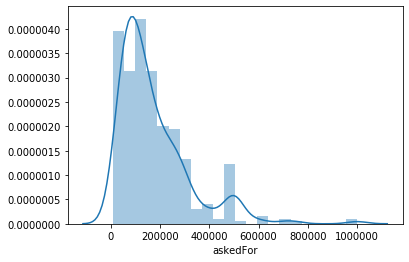

In [36]:
# histogram of asked for size on new data
sns.distplot(df_filter.askedFor)

In [37]:
df_filter.head()

,description,category,entrepreneurs,location,website,shark1,shark2,shark3,shark4,shark5,...,website_length,deal,episode,askedFor,exchangeForStake,valuation,season,Multiple_Entreprenuers,asked_size,value_size
0,Bluetooth device implant for your ear.,Novelties,Darrin Johnson,MN,NaN,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,short,0,1,1000000,15,6666667,1,0,large,large
1,Retail and wholesale pie factory with two reta...,Specialty Food,Tod Wilson,NJ,http://whybake.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,short,1,1,460000,10,4600000,1,0,medium,medium
2,Ava the Elephant is a godsend for frazzled par...,Baby and Child Care,Tiffany Krumins,GA,http://www.avatheelephant.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,medium,1,1,50000,15,333333,1,0,small,small
3,"Organizing, packing, and moving services deliv...",Consumer Services,"Nick Friedman, Omar Soliman",FL,http://collegehunkshaulingjunk.com/,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,medium,0,1,250000,25,1000000,1,0,small,small
4,One of the first entrepreneurs to pitch on Sha...,Specialty Food,Susan Knapp,CA,http://www.aperfectpear.com,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,medium,1,2,500000,15,3333333,1,0,medium,medium


In [38]:
# fill website null values
df_filter.website.fillna('none',inplace=True)

In [39]:
# assign a binary to see if website exists or doesn't exist
for i in range(len(df_filter)):
    if df_filter.website[i]=='none':
        df_filter.website[i]=0
    else:
        df_filter.website[i]=1

In [40]:
df_filter.head()

,description,category,entrepreneurs,location,website,shark1,shark2,shark3,shark4,shark5,...,website_length,deal,episode,askedFor,exchangeForStake,valuation,season,Multiple_Entreprenuers,asked_size,value_size
0,Bluetooth device implant for your ear.,Novelties,Darrin Johnson,MN,0,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,short,0,1,1000000,15,6666667,1,0,large,large
1,Retail and wholesale pie factory with two reta...,Specialty Food,Tod Wilson,NJ,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,short,1,1,460000,10,4600000,1,0,medium,medium
2,Ava the Elephant is a godsend for frazzled par...,Baby and Child Care,Tiffany Krumins,GA,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,medium,1,1,50000,15,333333,1,0,small,small
3,"Organizing, packing, and moving services deliv...",Consumer Services,"Nick Friedman, Omar Soliman",FL,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,medium,0,1,250000,25,1000000,1,0,small,small
4,One of the first entrepreneurs to pitch on Sha...,Specialty Food,Susan Knapp,CA,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,medium,1,2,500000,15,3333333,1,0,medium,medium


In [41]:
# amount of unique values per column in new data
df_filter.category.value_counts()

Specialty Food                                 59
Novelties                                      31
Baby and Child Care                            23
Personal Care and Cosmetics                    19
Online Services                                18
Storage and Cleaning Products                  17
Toys and Games                                 15
Consumer Services                              12
Pet Products                                   11
Kitchen Tools                                  11
Outdoor Recreation                             10
Electronics                                     9
Baby and Children's Entertainment               9
Men and Women's Apparel                         9
Women's Apparel                                 8
Automotive                                      8
Entertainment                                   8
Baby and Children's Apparel and Accessories     8
Professional Services                           8
Undergarments and Basics                        7


In [42]:
# dummy variables for pitch categories
pitch_cat_df=pd.get_dummies(df_filter.category)

In [43]:
# always need to drop one category so chose women's shoes as it has fairly few occurances
pitch_cat_df=pitch_cat_df.drop("Women's Shoes",axis=1)

In [44]:
# adding dummy data to main data
for col in pitch_cat_df.columns:
    df_filter[col]=pitch_cat_df[col]

In [45]:
# main data with dummy variables
df_filter.head()

,description,category,entrepreneurs,location,website,shark1,shark2,shark3,shark4,shark5,...,Professional Services,Specialty Food,Storage and Cleaning Products,Toys and Games,Undergarments and Basics,Water Bottles,Weddings,Wine Accessories,Women's Accessories,Women's Apparel
0,Bluetooth device implant for your ear.,Novelties,Darrin Johnson,MN,0,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,0,0,0,0,0,0,0,0,0,0
1,Retail and wholesale pie factory with two reta...,Specialty Food,Tod Wilson,NJ,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,0,1,0,0,0,0,0,0,0,0
2,Ava the Elephant is a godsend for frazzled par...,Baby and Child Care,Tiffany Krumins,GA,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,0,0,0,0,0,0,0,0,0,0
3,"Organizing, packing, and moving services deliv...",Consumer Services,"Nick Friedman, Omar Soliman",FL,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,0,0,0,0,0,0,0,0,0,0
4,One of the first entrepreneurs to pitch on Sha...,Specialty Food,Susan Knapp,CA,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,0,1,0,0,0,0,0,0,0,0


In [46]:
# columns in new data
df_filter.columns

Index(['description', 'category', 'entrepreneurs', 'location', 'website',
       'shark1', 'shark2', 'shark3', 'shark4', 'shark5', 'title',
       'episode-season', 'website_length', 'deal', 'episode', 'askedFor',
       'exchangeForStake', 'valuation', 'season', 'Multiple_Entreprenuers',
       'asked_size', 'value_size', 'Alcoholic Beverages', 'Automotive',
       'Baby and Child Care', 'Baby and Children's Apparel and Accessories',
       'Baby and Children's Bedding', 'Baby and Children's Entertainment',
       'Baby and Children's Food', 'Consumer Services', 'Costumes', 'Cycling',
       'Education', 'Electronics', 'Entertainment', 'Fashion Accessories',
       'Fitness Apparel and Accessories', 'Fitness Equipment',
       'Fitness Programs', 'Furniture', 'Gardening', 'Golf Products',
       'Health and Well-Being', 'Holiday Cheer', 'Home Accessories',
       'Home Improvement', 'Home Security Solutions', 'Homeopathic Remedies',
       'Kitchen Tools', 'Maternity', 'Men and Women'

In [47]:
df_filter.head()

,description,category,entrepreneurs,location,website,shark1,shark2,shark3,shark4,shark5,...,Professional Services,Specialty Food,Storage and Cleaning Products,Toys and Games,Undergarments and Basics,Water Bottles,Weddings,Wine Accessories,Women's Accessories,Women's Apparel
0,Bluetooth device implant for your ear.,Novelties,Darrin Johnson,MN,0,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,0,0,0,0,0,0,0,0,0,0
1,Retail and wholesale pie factory with two reta...,Specialty Food,Tod Wilson,NJ,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,0,1,0,0,0,0,0,0,0,0
2,Ava the Elephant is a godsend for frazzled par...,Baby and Child Care,Tiffany Krumins,GA,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,0,0,0,0,0,0,0,0,0,0
3,"Organizing, packing, and moving services deliv...",Consumer Services,"Nick Friedman, Omar Soliman",FL,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,0,0,0,0,0,0,0,0,0,0
4,One of the first entrepreneurs to pitch on Sha...,Specialty Food,Susan Knapp,CA,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,0,1,0,0,0,0,0,0,0,0


In [48]:
# adding new column
df_filter['sharks']=None

In [49]:
# filling sharks column with empty list
for i in range(len(df_filter)):
    df_filter['sharks'][i]=[]

In [50]:
# adding sharks in each pitch as list for each sharks occurance
for i in range(len(df_filter)):
    df_filter['sharks'][i].append([df_filter.shark1[i],df_filter.shark2[i],df_filter.shark3[i],df_filter.shark4[i],df_filter.shark5[i]])

In [51]:
df_filter.head()

,description,category,entrepreneurs,location,website,shark1,shark2,shark3,shark4,shark5,...,Specialty Food,Storage and Cleaning Products,Toys and Games,Undergarments and Basics,Water Bottles,Weddings,Wine Accessories,Women's Accessories,Women's Apparel,sharks
0,Bluetooth device implant for your ear.,Novelties,Darrin Johnson,MN,0,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,0,0,0,0,0,0,0,0,0,"[[Barbara Corcoran, Robert Herjavec, Kevin O'L..."
1,Retail and wholesale pie factory with two reta...,Specialty Food,Tod Wilson,NJ,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,1,0,0,0,0,0,0,0,0,"[[Barbara Corcoran, Robert Herjavec, Kevin O'L..."
2,Ava the Elephant is a godsend for frazzled par...,Baby and Child Care,Tiffany Krumins,GA,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,0,0,0,0,0,0,0,0,0,"[[Barbara Corcoran, Robert Herjavec, Kevin O'L..."
3,"Organizing, packing, and moving services deliv...",Consumer Services,"Nick Friedman, Omar Soliman",FL,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,0,0,0,0,0,0,0,0,0,"[[Barbara Corcoran, Robert Herjavec, Kevin O'L..."
4,One of the first entrepreneurs to pitch on Sha...,Specialty Food,Susan Knapp,CA,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,1,0,0,0,0,0,0,0,0,"[[Barbara Corcoran, Robert Herjavec, Kevin O'L..."


In [52]:
# this addresses the nested list issue
for i in range(len(df_filter)):
    df_filter.sharks[i]=df_filter.sharks[i][0]

In [53]:
df_filter.head()

,description,category,entrepreneurs,location,website,shark1,shark2,shark3,shark4,shark5,...,Specialty Food,Storage and Cleaning Products,Toys and Games,Undergarments and Basics,Water Bottles,Weddings,Wine Accessories,Women's Accessories,Women's Apparel,sharks
0,Bluetooth device implant for your ear.,Novelties,Darrin Johnson,MN,0,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,0,0,0,0,0,0,0,0,0,"[Barbara Corcoran, Robert Herjavec, Kevin O'Le..."
1,Retail and wholesale pie factory with two reta...,Specialty Food,Tod Wilson,NJ,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,1,0,0,0,0,0,0,0,0,"[Barbara Corcoran, Robert Herjavec, Kevin O'Le..."
2,Ava the Elephant is a godsend for frazzled par...,Baby and Child Care,Tiffany Krumins,GA,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,0,0,0,0,0,0,0,0,0,"[Barbara Corcoran, Robert Herjavec, Kevin O'Le..."
3,"Organizing, packing, and moving services deliv...",Consumer Services,"Nick Friedman, Omar Soliman",FL,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,0,0,0,0,0,0,0,0,0,"[Barbara Corcoran, Robert Herjavec, Kevin O'Le..."
4,One of the first entrepreneurs to pitch on Sha...,Specialty Food,Susan Knapp,CA,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,...,1,0,0,0,0,0,0,0,0,"[Barbara Corcoran, Robert Herjavec, Kevin O'Le..."


In [54]:
# info, null values, and data types for new data
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 76 columns):
description                                    433 non-null object
category                                       433 non-null object
entrepreneurs                                  366 non-null object
location                                       433 non-null object
website                                        433 non-null object
shark1                                         433 non-null object
shark2                                         433 non-null object
shark3                                         433 non-null object
shark4                                         433 non-null object
shark5                                         433 non-null object
title                                          433 non-null object
episode-season                                 433 non-null object
website_length                                 433 non-null object
deal                    

In [55]:
# unique values in sharks features
df_filter.sharks.astype(str).unique()

array(['[\'Barbara Corcoran\', \'Robert Herjavec\', "Kevin O\'Leary", \'Daymond John\', \'Kevin Harrington\']',
       '[\'Barbara Corcoran\', \'Robert Herjavec\', "Kevin O\'Leary", \'Daymond John\', \'Mark Cuban\']',
       '[\'Barbara Corcoran\', \'Robert Herjavec\', "Kevin O\'Leary", \'Jeff Foxworthy\', \'Daymond John\']',
       '[\'Lori Greiner\', \'Robert Herjavec\', "Kevin O\'Leary", \'Daymond John\', \'Mark Cuban\']',
       '[\'Lori Greiner\', \'Barbara Corcoran\', \'Robert Herjavec\', "Kevin O\'Leary", \'Mark Cuban\']',
       '[\'Lori Greiner\', "Kevin O\'Leary", \'Daymond John\', \'Mark Cuban\', \'John Paul DeJoria\']',
       '[\'Lori Greiner\', \'Steve Tisch\', "Kevin O\'Leary", \'Daymond John\', \'Mark Cuban\']',
       '[\'Lori Greiner\', "Kevin O\'Leary", \'Daymond John\', \'Mark Cuban\', \'Nick Woodman\']'],
      dtype=object)

In [56]:
# creating a dictionary to have numerical representation ofshark groups
sharks_dict={
    'group_1':['Barbara Corcoran', 'Robert Herjavec', "Kevin O'Leary", 'Daymond John', 'Kevin Harrington'],
    'group_2':['Barbara Corcoran', 'Robert Herjavec', "Kevin O'Leary", 'Daymond John', 'Mark Cuban'],
    'group_3':['Barbara Corcoran', 'Robert Herjavec', "Kevin O'Leary", 'Jeff Foxworthy', 'Daymond John'],
    'group_4':['Lori Greiner', 'Robert Herjavec', "Kevin O'Leary", 'Daymond John', 'Mark Cuban'],
    'group_5':['Lori Greiner', 'Barbara Corcoran', 'Robert Herjavec', "Kevin O\'Leary", 'Mark Cuban'],
    'group_6':['Lori Greiner', "Kevin O'Leary", 'Daymond John', 'Mark Cuban', 'John Paul DeJoria'],
    'group_7':['Lori Greiner', 'Steve Tisch', "Kevin O'Leary", 'Daymond John', 'Mark Cuban'],
    'group_8':['Lori Greiner', "Kevin O'Leary", 'Daymond John', 'Mark Cuban', 'Nick Woodman']
}

In [57]:
#
df_filter['shark_group']=None

In [58]:
# mapping shark groups
for i in range(len(df_filter)):
    if df_filter.sharks[i]==sharks_dict['group_1']:
        df_filter.shark_group[i]=1
    elif df_filter.sharks[i]==sharks_dict['group_2']:
        df_filter.shark_group[i]=2
    elif df_filter.sharks[i]==sharks_dict['group_3']:
        df_filter.shark_group[i]=3
    elif df_filter.sharks[i]==sharks_dict['group_4']:
        df_filter.shark_group[i]=4
    elif df_filter.sharks[i]==sharks_dict['group_5']:
        df_filter.shark_group[i]=5
    elif df_filter.sharks[i]==sharks_dict['group_6']:
        df_filter.shark_group[i]=6
    elif df_filter.sharks[i]==sharks_dict['group_7']:
        df_filter.shark_group[i]=7
    else:
        df_filter.shark_group[i]=8

In [59]:
df_filter.columns

Index(['description', 'category', 'entrepreneurs', 'location', 'website',
       'shark1', 'shark2', 'shark3', 'shark4', 'shark5', 'title',
       'episode-season', 'website_length', 'deal', 'episode', 'askedFor',
       'exchangeForStake', 'valuation', 'season', 'Multiple_Entreprenuers',
       'asked_size', 'value_size', 'Alcoholic Beverages', 'Automotive',
       'Baby and Child Care', 'Baby and Children's Apparel and Accessories',
       'Baby and Children's Bedding', 'Baby and Children's Entertainment',
       'Baby and Children's Food', 'Consumer Services', 'Costumes', 'Cycling',
       'Education', 'Electronics', 'Entertainment', 'Fashion Accessories',
       'Fitness Apparel and Accessories', 'Fitness Equipment',
       'Fitness Programs', 'Furniture', 'Gardening', 'Golf Products',
       'Health and Well-Being', 'Holiday Cheer', 'Home Accessories',
       'Home Improvement', 'Home Security Solutions', 'Homeopathic Remedies',
       'Kitchen Tools', 'Maternity', 'Men and Women'

In [60]:
# segmented view of data
df_filter.iloc[:,0:15].head()

,description,category,entrepreneurs,location,website,shark1,shark2,shark3,shark4,shark5,title,episode-season,website_length,deal,episode
0,Bluetooth device implant for your ear.,Novelties,Darrin Johnson,MN,0,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,short,0,1
1,Retail and wholesale pie factory with two reta...,Specialty Food,Tod Wilson,NJ,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,short,1,1
2,Ava the Elephant is a godsend for frazzled par...,Baby and Child Care,Tiffany Krumins,GA,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,medium,1,1
3,"Organizing, packing, and moving services deliv...",Consumer Services,"Nick Friedman, Omar Soliman",FL,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,medium,0,1
4,One of the first entrepreneurs to pitch on Sha...,Specialty Food,Susan Knapp,CA,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,A Perfect Pear,1-2,medium,1,2


In [61]:
df_filter.iloc[:,15:30].head()

,askedFor,exchangeForStake,valuation,season,Multiple_Entreprenuers,asked_size,value_size,Alcoholic Beverages,Automotive,Baby and Child Care,Baby and Children's Apparel and Accessories,Baby and Children's Bedding,Baby and Children's Entertainment,Baby and Children's Food,Consumer Services
0,1000000,15,6666667,1,0,large,large,0,0,0,0,0,0,0,0
1,460000,10,4600000,1,0,medium,medium,0,0,0,0,0,0,0,0
2,50000,15,333333,1,0,small,small,0,0,1,0,0,0,0,0
3,250000,25,1000000,1,0,small,small,0,0,0,0,0,0,0,1
4,500000,15,3333333,1,0,medium,medium,0,0,0,0,0,0,0,0


In [62]:
df_filter.iloc[:,30:45].head()

,Costumes,Cycling,Education,Electronics,Entertainment,Fashion Accessories,Fitness Apparel and Accessories,Fitness Equipment,Fitness Programs,Furniture,Gardening,Golf Products,Health and Well-Being,Holiday Cheer,Home Accessories
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
df_filter.iloc[:,45:].head()

,Home Improvement,Home Security Solutions,Homeopathic Remedies,Kitchen Tools,Maternity,Men and Women's Accessories,Men and Women's Apparel,Men and Women's Shoes,Men's Accessories,Mobile Apps,...,Storage and Cleaning Products,Toys and Games,Undergarments and Basics,Water Bottles,Weddings,Wine Accessories,Women's Accessories,Women's Apparel,sharks,shark_group
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[Barbara Corcoran, Robert Herjavec, Kevin O'Le...",1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[Barbara Corcoran, Robert Herjavec, Kevin O'Le...",1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[Barbara Corcoran, Robert Herjavec, Kevin O'Le...",1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[Barbara Corcoran, Robert Herjavec, Kevin O'Le...",1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[Barbara Corcoran, Robert Herjavec, Kevin O'Le...",1


In [64]:
df_filter.columns

Index(['description', 'category', 'entrepreneurs', 'location', 'website',
       'shark1', 'shark2', 'shark3', 'shark4', 'shark5', 'title',
       'episode-season', 'website_length', 'deal', 'episode', 'askedFor',
       'exchangeForStake', 'valuation', 'season', 'Multiple_Entreprenuers',
       'asked_size', 'value_size', 'Alcoholic Beverages', 'Automotive',
       'Baby and Child Care', 'Baby and Children's Apparel and Accessories',
       'Baby and Children's Bedding', 'Baby and Children's Entertainment',
       'Baby and Children's Food', 'Consumer Services', 'Costumes', 'Cycling',
       'Education', 'Electronics', 'Entertainment', 'Fashion Accessories',
       'Fitness Apparel and Accessories', 'Fitness Equipment',
       'Fitness Programs', 'Furniture', 'Gardening', 'Golf Products',
       'Health and Well-Being', 'Holiday Cheer', 'Home Accessories',
       'Home Improvement', 'Home Security Solutions', 'Homeopathic Remedies',
       'Kitchen Tools', 'Maternity', 'Men and Women'

In [65]:
# re-aligning order of columns
df_filter=df_filter[['deal','description','category', 'entrepreneurs', 'location', 'website', 'website_length','shark1',
       'shark2', 'shark3', 'shark4', 'shark5','sharks',
       'shark_group' ,'title', 'episode-season', 'episode', 'askedFor', 'exchangeForStake', 'valuation',
       'season', 'Multiple_Entreprenuers', 'asked_size', 'value_size',
       'Alcoholic Beverages', 'Automotive', 'Baby and Child Care',
       "Baby and Children's Apparel and Accessories",
       "Baby and Children's Bedding", "Baby and Children's Entertainment",
       "Baby and Children's Food", 'Consumer Services', 'Costumes', 'Cycling',
       'Education', 'Electronics', 'Entertainment', 'Fashion Accessories',
       'Fitness Apparel and Accessories', 'Fitness Equipment',
       'Fitness Programs', 'Furniture', 'Gardening', 'Golf Products',
       'Health and Well-Being', 'Holiday Cheer', 'Home Accessories',
       'Home Improvement', 'Home Security Solutions', 'Homeopathic Remedies',
       'Kitchen Tools', 'Maternity', "Men and Women's Accessories",
       "Men and Women's Apparel", "Men and Women's Shoes", "Men's Accessories",
       'Mobile Apps', 'Music', 'Non-Alcoholic Beverages', 'Novelties',
       'Online Services', 'Outdoor Recreation', 'Party Supplies',
       'Personal Care and Cosmetics', 'Pest Control', 'Pet Products',
       'Productivity Tools', 'Professional Services', 'Specialty Food',
       'Storage and Cleaning Products', 'Toys and Games',
       'Undergarments and Basics', 'Water Bottles', 'Weddings',
       'Wine Accessories', "Women's Accessories", "Women's Apparel"]]

In [66]:
df_filter.head()

,deal,description,category,entrepreneurs,location,website,website_length,shark1,shark2,shark3,...,Professional Services,Specialty Food,Storage and Cleaning Products,Toys and Games,Undergarments and Basics,Water Bottles,Weddings,Wine Accessories,Women's Accessories,Women's Apparel
0,0,Bluetooth device implant for your ear.,Novelties,Darrin Johnson,MN,0,short,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,...,0,0,0,0,0,0,0,0,0,0
1,1,Retail and wholesale pie factory with two reta...,Specialty Food,Tod Wilson,NJ,1,short,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,...,0,1,0,0,0,0,0,0,0,0
2,1,Ava the Elephant is a godsend for frazzled par...,Baby and Child Care,Tiffany Krumins,GA,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,...,0,0,0,0,0,0,0,0,0,0
3,0,"Organizing, packing, and moving services deliv...",Consumer Services,"Nick Friedman, Omar Soliman",FL,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,...,0,0,0,0,0,0,0,0,0,0
4,1,One of the first entrepreneurs to pitch on Sha...,Specialty Food,Susan Knapp,CA,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,...,0,1,0,0,0,0,0,0,0,0


In [67]:
# splitting dummies from main data
df_filter_basic=df_filter.iloc[:,0:24]
df_filter_dummies=df_filter.iloc[:,24:]

In [68]:
#df_filter_basic.to_csv('cleaned_shark.csv')

In [69]:
# keep shark1 shark2 ...

In [70]:
# creating new data frame to see if which shaks are present
sharks_list=[]
for shark in ['shark1','shark2','shark3','shark4','shark5']:
    sharks_list.append(pd.get_dummies(pd.get_dummies(df_filter_basic[shark])))

In [71]:
#
len(sharks_list)

5

In [72]:
# combining all data that will represent which sharks are present
sharks_df=pd.concat([sharks_list[0],sharks_list[1],sharks_list[2],sharks_list[3],sharks_list[4]],axis=1)

In [73]:
sharks_df

,Barbara Corcoran,Lori Greiner,Barbara Corcoran,Kevin O'Leary,Robert Herjavec,Steve Tisch,Daymond John,Kevin O'Leary,Robert Herjavec,Daymond John,Jeff Foxworthy,Kevin O'Leary,Mark Cuban,Daymond John,John Paul DeJoria,Kevin Harrington,Mark Cuban,Nick Woodman
0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
2,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0
429,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0
430,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0
431,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0


In [74]:
#sharks_df.to_csv('sharks_to_clean.csv')

In [76]:
# accounting for repeated sharks
sharks_df['Barbara Corcoran']=sharks_df['Barbara Corcoran.1']+sharks_df['Barbara Corcoran']
sharks_df['Lori Greiner']=sharks_df['Lori Greiner']
sharks_df["Kevin O'Leary"]=sharks_df["Kevin O'Leary"]+sharks_df["Kevin O'Leary.1"]+sharks_df["Kevin O'Leary.2"]
sharks_df['Mark Cuban']=sharks_df['Mark Cuban.1']+sharks_df['Mark Cuban']
sharks_df['Daymond John']=sharks_df['Daymond John']+sharks_df['Daymond John.1']+sharks_df['Daymond John.2']
sharks_df['Robert Herjavec']=sharks_df['Robert Herjavec.1']+sharks_df['Robert Herjavec']

In [77]:
# removing repeated sharks now that I dealt with repetition issue
sharks_df.drop(["Kevin O'Leary.1","Kevin O'Leary.2",'Barbara Corcoran.1','Mark Cuban.1',
                'Daymond John.1','Daymond John.2','Robert Herjavec.1'],
              axis=1,inplace=True)

In [78]:
sharks_df.head()

,Unnamed: 0,Barbara Corcoran,Lori Greiner,Kevin O'Leary,Robert Herjavec,Steve Tisch,Daymond John,Jeff Foxworthy,Mark Cuban,John Paul DeJoria,Kevin Harrington,Nick Woodman
0,0,1,0,1,1,0,1,0,0,0,1,0
1,1,1,0,1,1,0,1,0,0,0,1,0
2,2,1,0,1,1,0,1,0,0,0,1,0
3,3,1,0,1,1,0,1,0,0,0,1,0
4,4,1,0,1,1,0,1,0,0,0,1,0


In [79]:
# drop pointless column plus the one I need to drop for classic dummy variable rules
sharks_df.drop(['Unnamed: 0','Nick Woodman'],axis=1,inplace=True)

In [80]:
# preview of connecting basic data with shark dummies
pd.concat([df_filter_basic,sharks_df],axis=1)

,deal,description,category,entrepreneurs,location,website,website_length,shark1,shark2,shark3,...,Barbara Corcoran,Lori Greiner,Kevin O'Leary,Robert Herjavec,Steve Tisch,Daymond John,Jeff Foxworthy,Mark Cuban,John Paul DeJoria,Kevin Harrington
0,0,Bluetooth device implant for your ear.,Novelties,Darrin Johnson,MN,0,short,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,...,1,0,1,1,0,1,0,0,0,1
1,1,Retail and wholesale pie factory with two reta...,Specialty Food,Tod Wilson,NJ,1,short,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,...,1,0,1,1,0,1,0,0,0,1
2,1,Ava the Elephant is a godsend for frazzled par...,Baby and Child Care,Tiffany Krumins,GA,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,...,1,0,1,1,0,1,0,0,0,1
3,0,"Organizing, packing, and moving services deliv...",Consumer Services,"Nick Friedman, Omar Soliman",FL,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,...,1,0,1,1,0,1,0,0,0,1
4,1,One of the first entrepreneurs to pitch on Sha...,Specialty Food,Susan Knapp,CA,1,medium,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,...,1,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,1,Ultra-thin insoles that add protection without...,Fitness Apparel and Accessories,Bryan Scott,GA,1,medium,Lori Greiner,Robert Herjavec,Kevin O'Leary,...,0,1,1,1,0,1,0,1,0,0
429,0,Buck Mason makes high-quality men's clothing i...,Men and Women's Apparel,Sasha Koehn and Erik Schnakenberg,CA,1,medium,Lori Greiner,Robert Herjavec,Kevin O'Leary,...,0,1,1,1,0,1,0,1,0,0
430,1,Started in 2011 by three-time world record Str...,Outdoor Recreation,Greg Myerson,CT,1,medium,Lori Greiner,Robert Herjavec,Kevin O'Leary,...,0,1,1,1,0,1,0,1,0,0
431,0,"Frameri answers the question, ""Why aren't your...",Men and Women's Accessories,Konrad Billetz and Kevin Habich,OH,1,short,Lori Greiner,Robert Herjavec,Kevin O'Leary,...,0,1,1,1,0,1,0,1,0,0


In [81]:
# connecting shark and category dummiees
df_filter_dummies=pd.concat([df_filter_dummies,sharks_df],axis=1)

# I need to address categorical data numerically

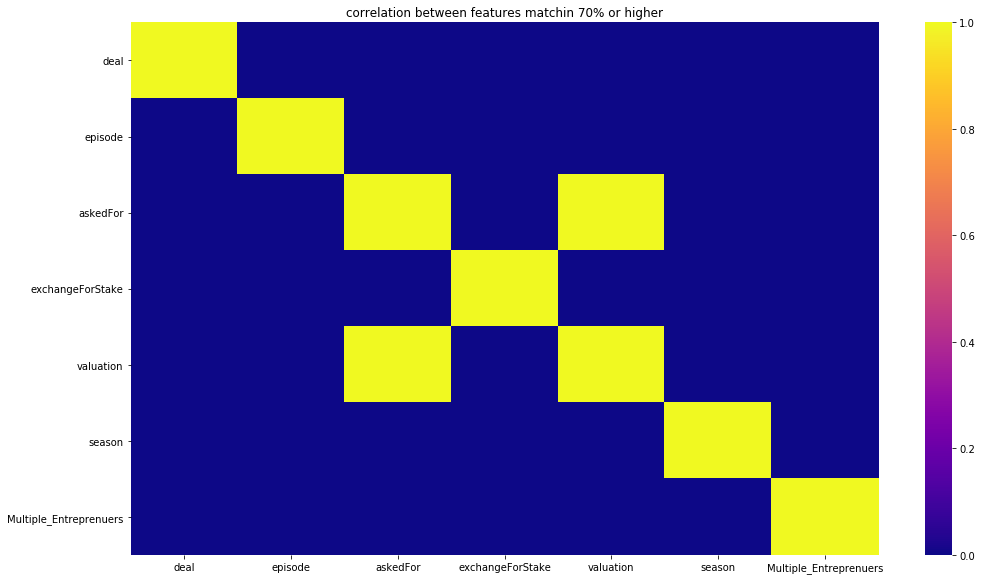

In [82]:
# initial correlation view
plt.figure(figsize=(15,8))
sns.heatmap(abs(df_filter_basic.corr()>=0.7),cmap='plasma')
plt.tight_layout()
plt.title('correlation between features matchin 70% or higher')
plt.show()

In [83]:
df_filter_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 24 columns):
deal                      433 non-null int64
description               433 non-null object
category                  433 non-null object
entrepreneurs             366 non-null object
location                  433 non-null object
website                   433 non-null object
website_length            433 non-null object
shark1                    433 non-null object
shark2                    433 non-null object
shark3                    433 non-null object
shark4                    433 non-null object
shark5                    433 non-null object
sharks                    433 non-null object
shark_group               433 non-null object
title                     433 non-null object
episode-season            433 non-null object
episode                   433 non-null int64
askedFor                  433 non-null int64
exchangeForStake          433 non-null int64
valuation                

In [84]:
# function to target encode other categorical data
def target_encode(df,target,col):
    
    dummy_dict = {}
    dummy_df = df[[col,target]].groupby(col,as_index=False).mean()
    for i in range(len(dummy_df)):
        dummy_dict[dummy_df.iloc[i,0]]=dummy_df.iloc[i,1]
    df[col]=df[col].map(lambda x: dummy_dict[x])
    
    return df[col]

In [85]:
df_filter_basic.columns

Index(['deal', 'description', 'category', 'entrepreneurs', 'location',
       'website', 'website_length', 'shark1', 'shark2', 'shark3', 'shark4',
       'shark5', 'sharks', 'shark_group', 'title', 'episode-season', 'episode',
       'askedFor', 'exchangeForStake', 'valuation', 'season',
       'Multiple_Entreprenuers', 'asked_size', 'value_size'],
      dtype='object')

In [86]:
# drop unique and un-needed values
df_filter_basic.drop(['description','sharks','title','episode-season','category','entrepreneurs'],axis=1,inplace=True)

In [87]:
df_filter_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 18 columns):
deal                      433 non-null int64
location                  433 non-null object
website                   433 non-null object
website_length            433 non-null object
shark1                    433 non-null object
shark2                    433 non-null object
shark3                    433 non-null object
shark4                    433 non-null object
shark5                    433 non-null object
shark_group               433 non-null object
episode                   433 non-null int64
askedFor                  433 non-null int64
exchangeForStake          433 non-null int64
valuation                 433 non-null int64
season                    433 non-null int64
Multiple_Entreprenuers    433 non-null int64
asked_size                433 non-null category
value_size                433 non-null category
dtypes: category(2), int64(7), object(9)
memory usage: 55.3+ KB


In [88]:
# assigning float type to shark group
df_filter_basic.shark_group=df_filter_basic.shark_group.astype(float)

In [89]:
df_filter_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 18 columns):
deal                      433 non-null int64
location                  433 non-null object
website                   433 non-null object
website_length            433 non-null object
shark1                    433 non-null object
shark2                    433 non-null object
shark3                    433 non-null object
shark4                    433 non-null object
shark5                    433 non-null object
shark_group               433 non-null float64
episode                   433 non-null int64
askedFor                  433 non-null int64
exchangeForStake          433 non-null int64
valuation                 433 non-null int64
season                    433 non-null int64
Multiple_Entreprenuers    433 non-null int64
asked_size                433 non-null category
value_size                433 non-null category
dtypes: category(2), float64(1), int64(7), object(8)
memory usage: 55

In [90]:
# using target encoder function
for col in df_filter_basic.select_dtypes(exclude=[int,float]).columns:
    df_filter_basic[col]=target_encode(df_filter_basic,'deal',col)

In [91]:
df_filter_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 18 columns):
deal                      433 non-null int64
location                  433 non-null float64
website                   433 non-null float64
website_length            433 non-null float64
shark1                    433 non-null float64
shark2                    433 non-null float64
shark3                    433 non-null float64
shark4                    433 non-null float64
shark5                    433 non-null float64
shark_group               433 non-null float64
episode                   433 non-null int64
askedFor                  433 non-null int64
exchangeForStake          433 non-null int64
valuation                 433 non-null int64
season                    433 non-null int64
Multiple_Entreprenuers    433 non-null int64
asked_size                433 non-null category
value_size                433 non-null category
dtypes: category(2), float64(9), int64(7)
memory usage: 55.3 

In [92]:
# assigning float type to rest of numerical data
for col in df_filter_basic.columns:
    df_filter_basic[col]=df_filter_basic[col].astype(float)

In [93]:
df_filter_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 18 columns):
deal                      433 non-null float64
location                  433 non-null float64
website                   433 non-null float64
website_length            433 non-null float64
shark1                    433 non-null float64
shark2                    433 non-null float64
shark3                    433 non-null float64
shark4                    433 non-null float64
shark5                    433 non-null float64
shark_group               433 non-null float64
episode                   433 non-null float64
askedFor                  433 non-null float64
exchangeForStake          433 non-null float64
valuation                 433 non-null float64
season                    433 non-null float64
Multiple_Entreprenuers    433 non-null float64
asked_size                433 non-null float64
value_size                433 non-null float64
dtypes: float64(18)
memory usage: 61.0 KB


In [94]:
# assigning float type to rest of numerical data, sort of...
for col in df_filter_dummies.columns:
    df_filter_dummies[col]=df_filter_dummies[col].astype(float)

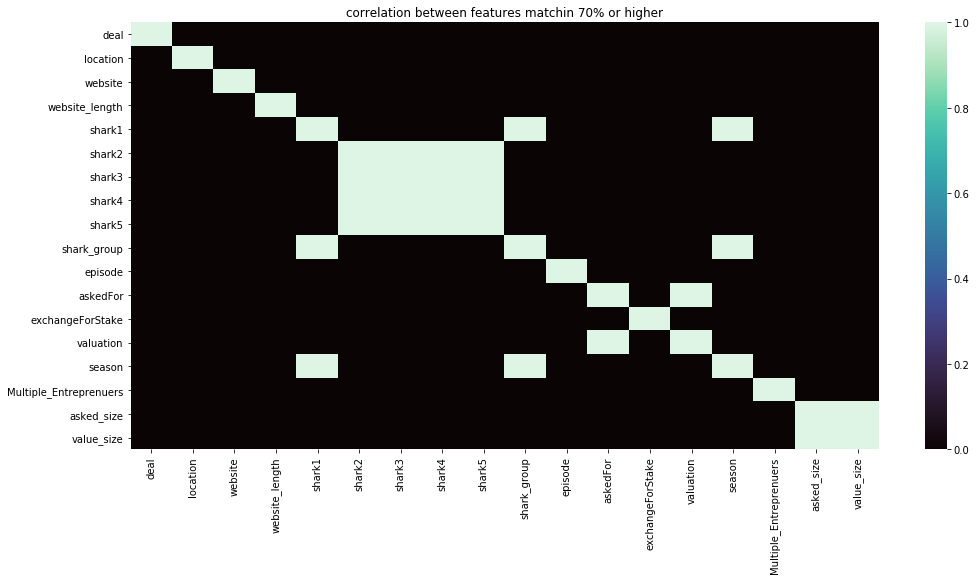

In [95]:
# new correlation view
plt.figure(figsize=(15,8))
sns.heatmap(abs(df_filter_basic.corr()>=0.7),cmap='mako')
plt.tight_layout()
plt.title('correlation between features matchin 70% or higher')
plt.show()

In [96]:
# moving toward less correlation
df_filter_basic.drop(['season','value_size'],axis=1,inplace=True)

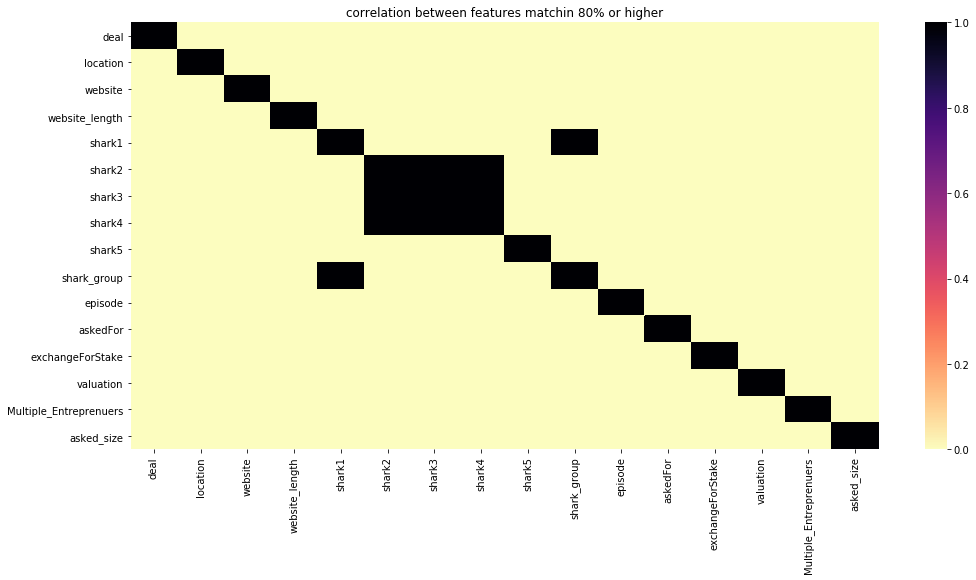

In [97]:
plt.figure(figsize=(15,8))
sns.heatmap(abs(df_filter_basic.corr()>=0.8),cmap='magma_r')
plt.tight_layout()
plt.title('correlation between features matchin 80% or higher')
plt.show()

In [98]:
df_filter_basic.drop(['shark_group'],axis=1,inplace=True)

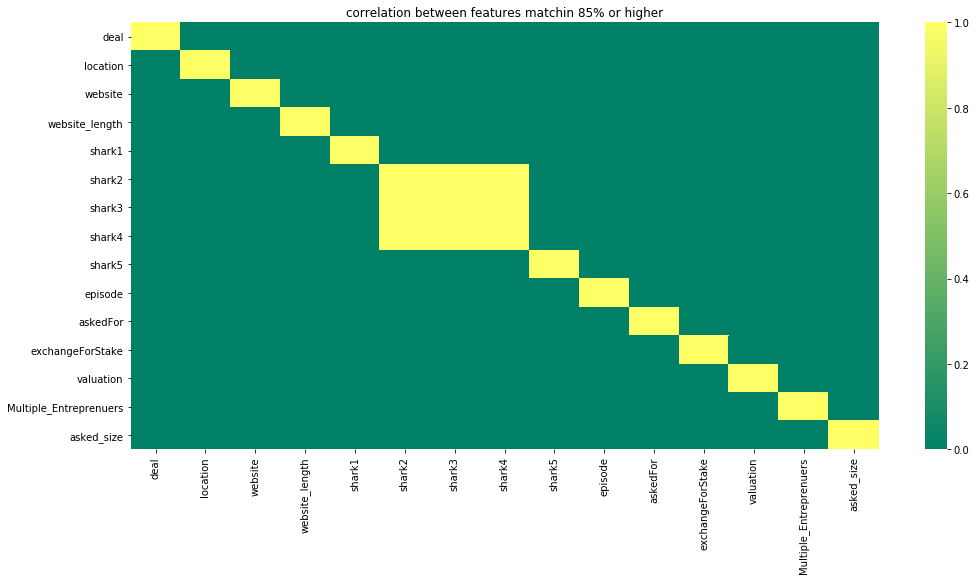

In [99]:
plt.figure(figsize=(15,8))
sns.heatmap(abs(df_filter_basic.corr()>=0.85),cmap='summer')
plt.tight_layout()
plt.title('correlation between features matchin 85% or higher')
plt.show()

# I'd like to keep info on which shark was in even though it has high correlation

In [100]:
# putting together all my data having addressed correlation
df = pd.concat([df_filter_basic,df_filter_dummies],axis=1)

In [101]:
df.head()

,deal,location,website,website_length,shark1,shark2,shark3,shark4,shark5,episode,...,Barbara Corcoran,Lori Greiner,Kevin O'Leary,Robert Herjavec,Steve Tisch,Daymond John,Jeff Foxworthy,Mark Cuban,John Paul DeJoria,Kevin Harrington
0,0.0,0.200000,0.352941,0.494845,0.486911,0.498489,0.5,0.5,0.457143,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.800000,0.528822,0.494845,0.486911,0.498489,0.5,0.5,0.457143,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.600000,0.528822,0.525526,0.486911,0.498489,0.5,0.5,0.457143,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.592593,0.528822,0.525526,0.486911,0.498489,0.5,0.5,0.457143,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.520325,0.528822,0.525526,0.486911,0.498489,0.5,0.5,0.457143,2.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [102]:
# renaming target variable
df['Target']=df.deal

In [103]:
# split predictors and target
y=df.Target
X=df.drop(['deal','Target'],axis=1)

In [104]:
# scale data and assign standard scaler variable
X_ss=X.copy()
ss = StandardScaler()
for col in X_ss.columns:
    X_ss[col]=ss.fit_transform(X_ss[[col]])

In [105]:
# scale data and assign max absolute scaler variable
X_ma=X.copy()
ma = MaxAbsScaler()
for col in X_ma.columns:
    X_ma[col]=ma.fit_transform(X_ma[[col]])

In [106]:
# train - test - split for training and validation
X_train, X_test, y_train, y_test = train_test_split(X_ss,y,random_state=14,test_size=0.25)

In [107]:
# function to create and evaluate model
def classification_model(mod):
    model=mod
    model.fit(X_train,y_train)
    pred=mod.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,pred),cmap='winter')
    print(classification_report(y_test,pred))

In [108]:
# import and instantiate classification models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

svm=SVC()
knn=KNeighborsClassifier()
logreg=LogisticRegression()
sgd=SGDClassifier()
rf=RandomForestClassifier(random_state=14)

              precision    recall  f1-score   support

         0.0       0.63      0.55      0.59        56
         1.0       0.58      0.66      0.62        53

    accuracy                           0.61       109
   macro avg       0.61      0.61      0.60       109
weighted avg       0.61      0.61      0.60       109



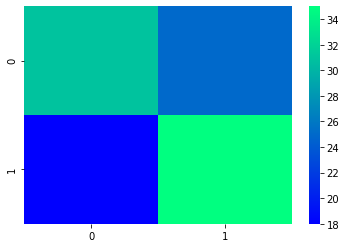

In [109]:
# random forest model
classification_model(rf)

In [110]:
# feature importances
fi=pd.DataFrame(rf.feature_importances_).T

In [111]:
# giving names to feature importance
fi.columns=X.columns

In [112]:
# sorting from highest to lowest feature importance
fi_1=fi.T.sort_values(by=0,ascending=False)

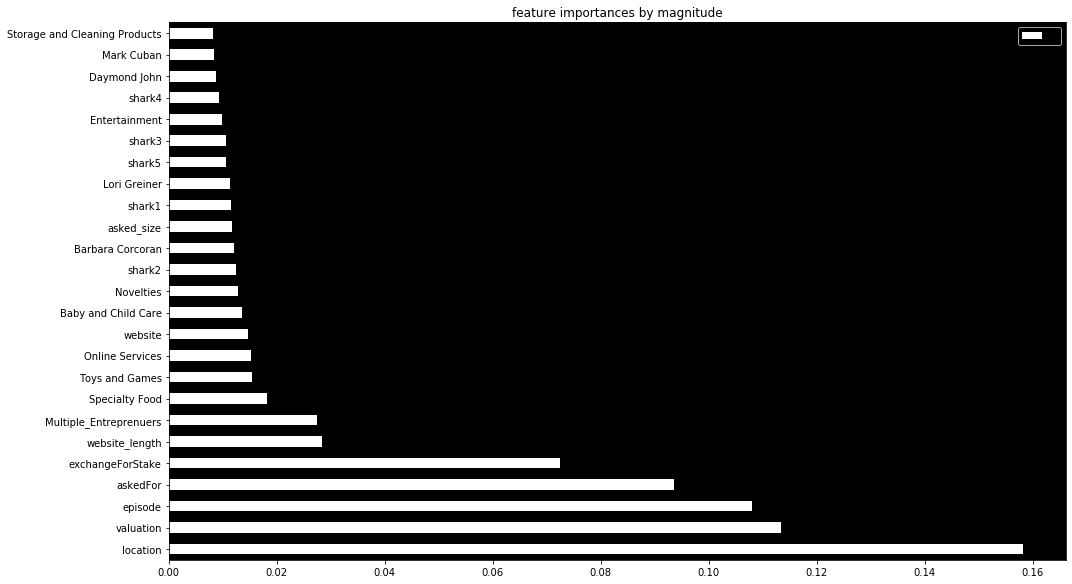

In [113]:
# visual
with sns.axes_style({'axes.facecolor':'black'}):
    fi_1[0:25].plot(kind='barh',figsize=(15,8),color='white')
    plt.tight_layout()
    plt.title('feature importances by magnitude')
    plt.show()

              precision    recall  f1-score   support

         0.0       0.67      0.61      0.64        56
         1.0       0.62      0.68      0.65        53

    accuracy                           0.64       109
   macro avg       0.64      0.64      0.64       109
weighted avg       0.64      0.64      0.64       109



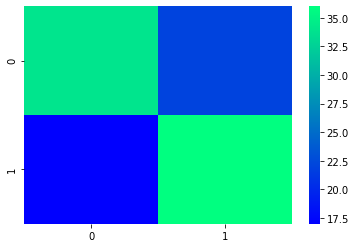

In [114]:
# trying logistic regression
classification_model(logreg)

In [115]:
# logistic regression coefficients
logreg.coef_

array([[ 8.84605678e-01,  1.98754141e-01,  4.04333642e-01,
        -1.09607727e-03,  4.70187389e-02, -2.96757997e-02,
        -2.96757997e-02, -4.03828211e-02,  5.28466091e-02,
         3.43439097e-01, -3.18708439e-01, -5.22779270e-01,
        -2.05912510e-02,  1.18908729e-01, -4.57162635e-02,
         1.20225282e-02,  1.51095583e-01,  1.72484469e-01,
        -3.03600530e-01, -7.01696552e-02, -6.29983359e-04,
        -1.59828831e-01,  6.30132998e-02,  2.90829110e-01,
         1.71909233e-01,  6.28344608e-02, -6.84125678e-01,
        -2.97435441e-01, -9.09556467e-02, -1.48270038e-01,
        -8.82291778e-02,  3.94119901e-01,  5.38470527e-02,
         6.16067492e-02,  1.51872952e-01, -1.13617565e-02,
        -5.19042681e-02,  3.66737724e-01, -5.33561903e-02,
        -1.18856833e-01,  1.63557838e-01, -2.99334870e-01,
        -2.73752951e-01, -2.80167337e-02, -9.81813117e-02,
        -7.50906969e-02,  2.91277624e-01,  4.26836424e-01,
        -9.75510688e-03,  1.20487538e-02, -9.69372563e-0

In [116]:
# data frame for coefficients
fi=pd.DataFrame(logreg.coef_)

In [117]:
# names for coefficients
fi.columns=X.columns

In [118]:
# sorting coefficiens
fi_1=fi.T.sort_values(by=0,ascending=False)

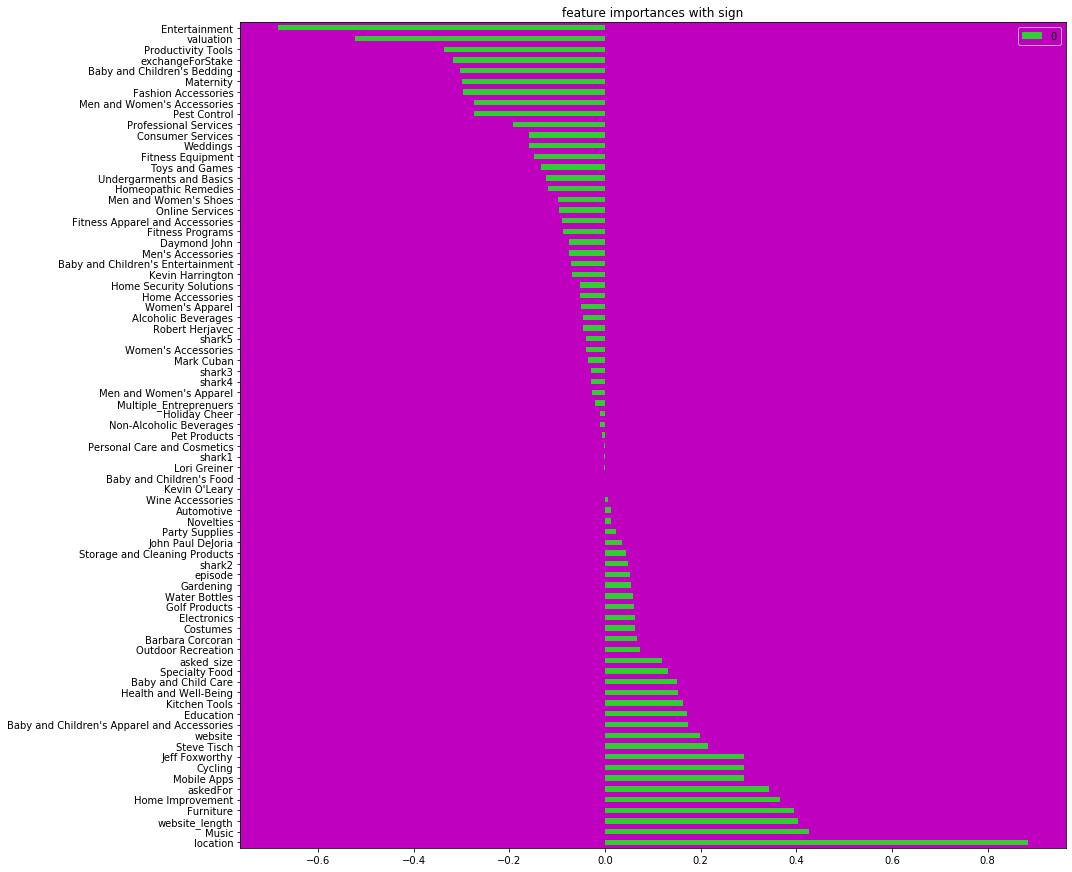

In [119]:
# visual
with sns.axes_style({'axes.facecolor':'m'}):
    fi_1.plot(kind='barh',figsize=(15,12),color='limegreen')
    plt.tight_layout()
    plt.title('feature importances with sign')
    plt.show()

In [120]:
# run model again with no sharks correlation and with gridsearch

In [121]:
# dropping sharks to re-evaluate model
df.drop(['shark1','shark2','shark3','shark4','shark5'],axis=1,inplace=True)

In [122]:
# re-assign x and y
y=df.Target
X=df.drop(['deal','Target'],axis=1)

In [123]:
# scale data
X_ss=X.copy()
ss = StandardScaler()
for col in X_ss.columns:
    X_ss[col]=ss.fit_transform(X_ss[[col]])
# scale data
X_ma=X.copy()
ma = MaxAbsScaler()
for col in X_ma.columns:
    X_ma[col]=ma.fit_transform(X_ma[[col]])

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X_ss,y,random_state=14,test_size=0.25)

              precision    recall  f1-score   support

         0.0       0.67      0.61      0.64        56
         1.0       0.62      0.68      0.65        53

    accuracy                           0.64       109
   macro avg       0.64      0.64      0.64       109
weighted avg       0.64      0.64      0.64       109



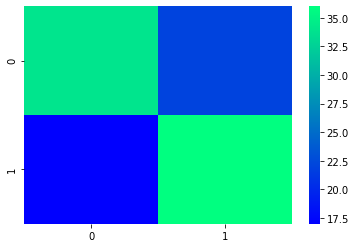

In [129]:
# updated logistic regression model
classification_model(logreg)

In [130]:
fi=pd.DataFrame(logreg.coef_)

In [131]:
fi.columns=X_train.columns

In [132]:
fi_1=fi.T.sort_values(by=0,ascending=False)

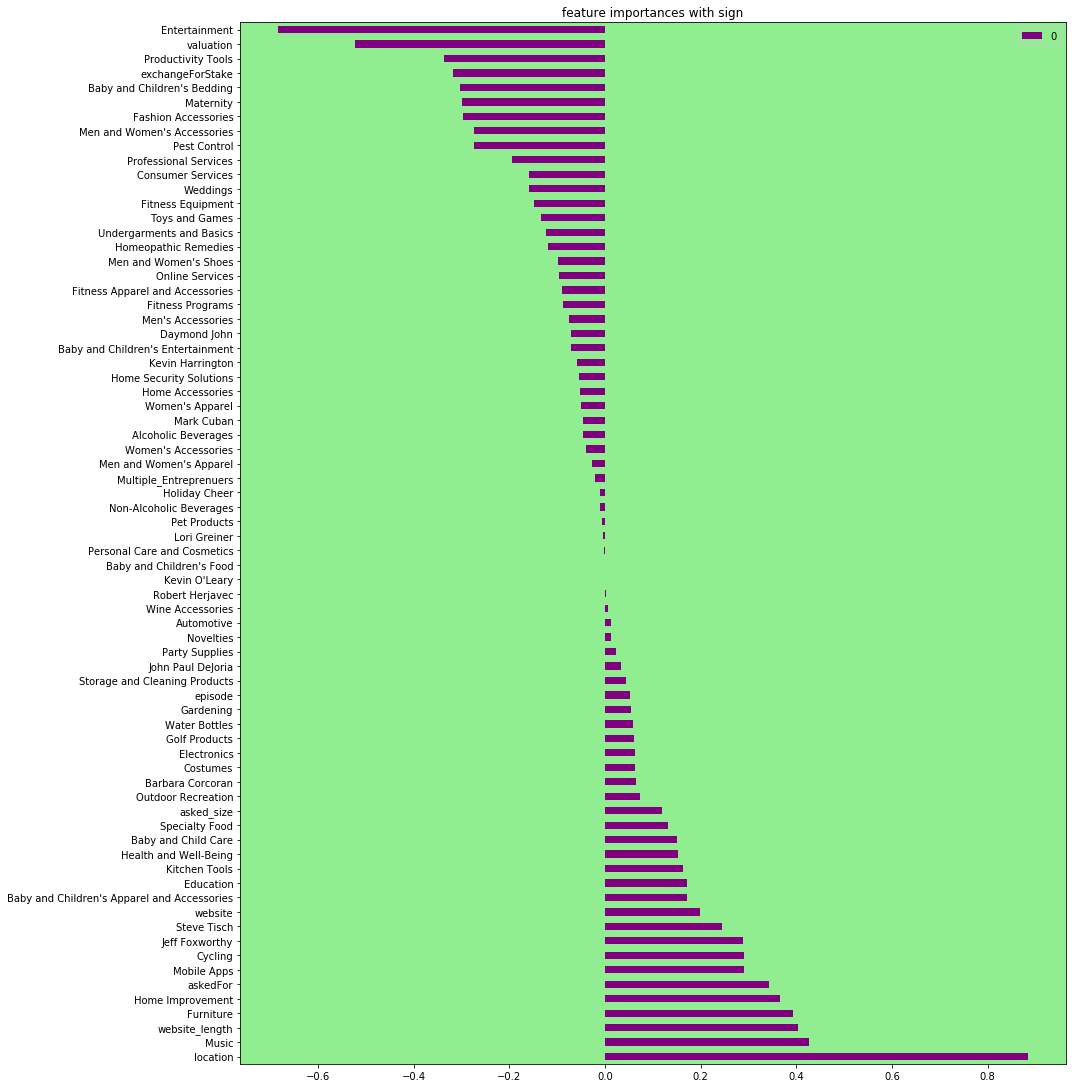

In [133]:
# updated visual
with sns.axes_style({'axes.facecolor':'lightgreen'}):
    fi_1.plot(kind='barh',figsize=(15,15),color='purple')
    plt.tight_layout()
    plt.title('feature importances with sign')
    plt.show()

In [133]:
# pipeline

In [134]:
# pipeline imports
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# dimensionality reduction
## this code is designed to find the number of features needed in the X data for an optimal accuracy score

def optimize_score_rfe(scaler, dataframe,method,style,target_variable,ts,cross_val=5,goal='accuracy'):
    
    """
    Input a goal, method, style (the method of analysis written as a string), and number of cross validations and 
    receive an optimal score, number of features used, and list of features used as an output
    """
    
    # Imports and initializing variables
    mms = scaler
    old_score = 0
    old_features_used = 1

    # Optimize features needed
    for i in range(1,df.shape[1]):
        y = dataframe.Target
        X = dataframe.drop('Target',axis=1)
        selector = RFE(method,n_features_to_select=i)
        # selector = RFECV(estimator=method, step=1, cv=StratifiedKFold(cross_val), scoring=goal,min_features_to_select=i)
        selector = selector.fit(X, y.values.ravel())
        selected_columns = X.columns[selector.support_]
        new_y = dataframe.Target
        new_X = dataframe[selected_columns]
        for col in new_X.columns:
            new_X[col] = mms.fit_transform(new_X[[col]])
        X_train, X_test, y_train, y_test = train_test_split(new_X,new_y,test_size=ts,random_state=14) 
        method.fit(X_train,y_train)
        Y_pred = method.predict(X_test)
        if style == 'Linear_Regression':
            accuracy = r2_score(y_test, Y_pred)
        else:
            accuracy = accuracy_score(y_test, Y_pred)
        new_score = accuracy
        if new_score > old_score:
            score = new_score
            features_used = i
            old_score = new_score
            old_features_used = i
        else:
            score = old_score
            features_used = old_features_used
    
        # crate new data frame based on work
        # selector_new = RFECV(estimator=method, step=1, cv=StratifiedKFold(cross_val), scoring='accuracy',min_features_to_select=features_used)
        selector_new = RFE(method,n_features_to_select=features_used)
        selector_new = selector_new.fit(X, y.values.ravel())
        selected_columns_new = X.columns[selector_new.support_]
        
    # print discoveries
    print(f'Predicting: {target_variable}')
    print('')
    print(f'The optimal score is {100*round(score,2)}%, and it makes use of {features_used} features from the data.')
    print('')
    print(f'Those features are: {list(selected_columns_new)}')

In [ ]:
# dimensionality reduction
## principal component analysis

def run_pca(X_tr,components):
    pca = PCA(n_components=components)
    pca.fit(X_tr)
    cumsum = np.cumsum(pca.explained_variance_ratio_)*100
    d = [n for n in range(len(cumsum))]
    plt.figure(figsize=(6,4))
    plt.plot(d, cumsum, color='red', label = 'Explained Variance')
    plt.title('Explained Variance vs Number of Components')
    plt.ylabel('Explained Variance')
    plt.xlabel('Number of Components')
    plt.axhline(y = 90, color='k', linestyle='--', label = '90% of Explained Variance')
    plt.legend(loc='best')
    #X_train_pca = pd.DataFrame(pca_fraud.fit_transform(X_train))
    #X_test_pca = pd.DataFrame(pca_fraud.transform(X_test))
    #train_pca = X_train_pca.copy()
    #train_pca.target=y_train